In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu6(x):  # ReLU limitada entre 0 e 1
    return np.minimum(np.maximum(0, x), 1)

# Derivadas
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu6_derivative(x):
    return np.where((x > 0) & (x < 1), 1, 0)

# Dataset: [idade, autorização]
X = np.array([
    [15, 0], [15, 1],
    [16, 0], [16, 1],
    [17, 0], [17, 1],
    [18, 0], [18, 1],
    [19, 0], [19, 1],
    [20, 0], [20, 1]
], dtype=float)
y = np.array([[0],[1],[0],[1],[0],[1],[1],[1],[1],[1],[1],[1]])

# Normalizar idade (primeira coluna) para 0 a 1
X[:,0] = X[:,0] / 20

## Função de treinamento da rede

In [6]:
def treinar_rede(activation_function, activation_derivative, epochs=5000, learning_rate=0.1):
    np.random.seed(42)
    weights_1 = np.random.randn(2, 3)
    bias_1 = np.random.randn(3)
    weights_2 = np.random.randn(3, 1)
    bias_2 = np.random.randn(1)
    errors = []

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, weights_1) + bias_1
        a1 = activation_function(z1)
        z2 = np.dot(a1, weights_2) + bias_2
        output = activation_function(z2)

        # Erro
        error = y - output
        errors.append(np.mean(np.square(error)))

        # Backpropagation
        d_error = -2 * error / len(X)
        d_output = activation_derivative(z2)
        grad2 = d_error * d_output
        grad1 = np.dot(grad2, weights_2.T) * activation_derivative(z1)

        # Atualização dos pesos
        weights_2 -= learning_rate * np.dot(a1.T, grad2)
        bias_2 -= learning_rate * np.sum(grad2, axis=0)
        weights_1 -= learning_rate * np.dot(X.T, grad1)
        bias_1 -= learning_rate * np.sum(grad1, axis=0)

        if epoch % 1000 == 0:
            print(f"Época {epoch}, Erro: {errors[-1]}")

    # Plot do erro
    plt.plot(range(epochs), errors)
    plt.title(f"Erro ao longo do tempo ({activation_function.__name__})")
    plt.xlabel("Época")
    plt.ylabel("Erro")
    plt.show()

    # Teste
    print(f"\nTeste da rede ({activation_function.__name__}):")
    for i in range(len(X)):
        z1 = np.dot(X[i], weights_1) + bias_1
        a1 = activation_function(z1)
        z2 = np.dot(a1, weights_2) + bias_2
        output = activation_function(z2)
        print(f"Entrada: {X[i]}, Esperado: {y[i]}, Saída: {output}")

    return weights_1, bias_1, weights_2, bias_2

## Treinar com Sigmoid

Época 0, Erro: 0.21957329819109103
Época 1000, Erro: 0.1651952738505109
Época 2000, Erro: 0.13664460757548677
Época 3000, Erro: 0.12551855276950086
Época 4000, Erro: 0.11747012055814789


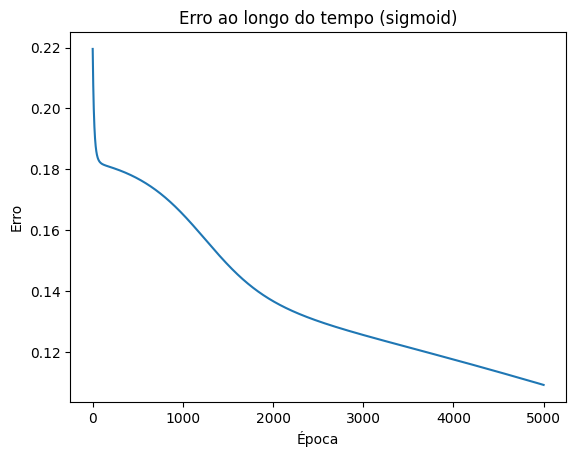


Teste da rede (sigmoid):
Entrada: [0.75 0.  ], Esperado: [0], Saída: [0.45087775]
Entrada: [0.75 1.  ], Esperado: [1], Saída: [0.93990746]
Entrada: [0.8 0. ], Esperado: [0], Saída: [0.47555424]
Entrada: [0.8 1. ], Esperado: [1], Saída: [0.94191886]
Entrada: [0.85 0.  ], Esperado: [0], Saída: [0.50030792]
Entrada: [0.85 1.  ], Esperado: [1], Saída: [0.94376876]
Entrada: [0.9 0. ], Esperado: [1], Saída: [0.52496051]
Entrada: [0.9 1. ], Esperado: [1], Saída: [0.94547161]
Entrada: [0.95 0.  ], Esperado: [1], Saída: [0.54933755]
Entrada: [0.95 1.  ], Esperado: [1], Saída: [0.94704054]
Entrada: [1. 0.], Esperado: [1], Saída: [0.57327393]
Entrada: [1. 1.], Esperado: [1], Saída: [0.94848747]


In [7]:
weights_1_s, bias_1_s, weights_2_s, bias_2_s = treinar_rede(sigmoid, sigmoid_derivative)

## Treinar com ReLU limitada (ReLU6)

Época 0, Erro: 0.21859013111908923
Época 1000, Erro: 0.023570665407240534
Época 2000, Erro: 0.013265460376689889
Época 3000, Erro: 0.006838176070307906
Época 4000, Erro: 0.0029180556687805944


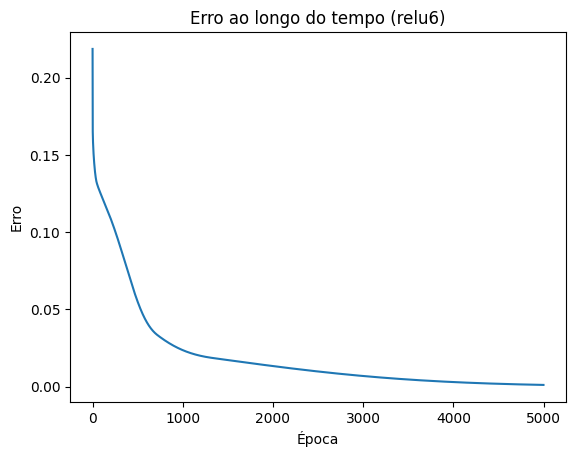


Teste da rede (relu6):
Entrada: [0.75 0.  ], Esperado: [0], Saída: [0.]
Entrada: [0.75 1.  ], Esperado: [1], Saída: [0.9994505]
Entrada: [0.8 0. ], Esperado: [0], Saída: [0.]
Entrada: [0.8 1. ], Esperado: [1], Saída: [0.9994505]
Entrada: [0.85 0.  ], Esperado: [0], Saída: [0.08085176]
Entrada: [0.85 1.  ], Esperado: [1], Saída: [0.9994505]
Entrada: [0.9 0. ], Esperado: [1], Saída: [0.92080117]
Entrada: [0.9 1. ], Esperado: [1], Saída: [0.9994505]
Entrada: [0.95 0.  ], Esperado: [1], Saída: [1.]
Entrada: [0.95 1.  ], Esperado: [1], Saída: [1.]
Entrada: [1. 0.], Esperado: [1], Saída: [1.]
Entrada: [1. 1.], Esperado: [1], Saída: [1.]


In [8]:
weights_1_r, bias_1_r, weights_2_r, bias_2_r = treinar_rede(relu6, relu6_derivative)